#**PARTE 1 -** Base de dados

##**1.1 -** Leitura ESC-50 e Audioset

ESC-50
- Mais fácil, já está com o df praticamente pronto

In [ ]:
!git clone https://github.com/karolpiczak/ESC-50.git
%cd ESC-50

Cloning into 'ESC-50'...
remote: Enumerating objects: 4199, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 4199 (delta 40), reused 38 (delta 18), pack-reused 4136
Receiving objects: 100% (4199/4199), 878.79 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (287/287), done.
Updating files: 100% (2011/2011), done.
/content/ESC-50/ESC-50/ESC-50


In [ ]:
import pandas as pd
metadados = pd.read_csv('meta/esc50.csv')
metadados.head()
#print(len(metadados))

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [ ]:
#Dicionário
target_category_dict = dict(zip(metadados['target'], metadados['category']))
target_category_dict

{0: 'dog',
 14: 'chirping_birds',
 36: 'vacuum_cleaner',
 19: 'thunderstorm',
 30: 'door_wood_knock',
 34: 'can_opening',
 9: 'crow',
 22: 'clapping',
 48: 'fireworks',
 41: 'chainsaw',
 47: 'airplane',
 31: 'mouse_click',
 17: 'pouring_water',
 45: 'train',
 8: 'sheep',
 15: 'water_drops',
 46: 'church_bells',
 37: 'clock_alarm',
 32: 'keyboard_typing',
 16: 'wind',
 25: 'footsteps',
 4: 'frog',
 3: 'cow',
 27: 'brushing_teeth',
 43: 'car_horn',
 12: 'crackling_fire',
 40: 'helicopter',
 29: 'drinking_sipping',
 10: 'rain',
 7: 'insects',
 26: 'laughing',
 6: 'hen',
 44: 'engine',
 23: 'breathing',
 20: 'crying_baby',
 49: 'hand_saw',
 24: 'coughing',
 39: 'glass_breaking',
 28: 'snoring',
 18: 'toilet_flush',
 2: 'pig',
 35: 'washing_machine',
 38: 'clock_tick',
 21: 'sneezing',
 1: 'rooster',
 11: 'sea_waves',
 42: 'siren',
 5: 'cat',
 33: 'door_wood_creaks',
 13: 'crickets'}

In [ ]:
list_to_keep = ['church_bells','siren','dog','crying_baby','fireworks','footsteps','clock_alarm','train','cat']
df_esc = metadados[metadados['category'].isin(list_to_keep)]
print(df_esc.head())
print(len(df_esc))

             filename  fold  target   category  esc10  src_file take
0    1-100032-A-0.wav     1       0        dog   True    100032    A
14   1-110389-A-0.wav     1       0        dog   True    110389    A
17  1-115545-A-48.wav     1      48  fireworks  False    115545    A
18  1-115545-B-48.wav     1      48  fireworks  False    115545    B
19  1-115545-C-48.wav     1      48  fireworks  False    115545    C
360


Audioset
- Vamos precisar criar um df com o filename e o label

In [ ]:
import pandas as pd

In [ ]:
!pip install gdown
import gdown
import zipfile

#https://drive.google.com/file/d/1RAD1x5Y72Ntl91D4a0l0sPnrLm6T3mf7/view?usp=sharing

# Baixar o arquivo ZIP do Google Drive
file_id = "1RAD1x5Y72Ntl91D4a0l0sPnrLm6T3mf7"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/audios_audioset.zip"
gdown.download(url, output, quiet=False)

# Extrair o arquivo ZIP
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("/content/audios_audioset")

# Verificar arquivos extraídos
import os

extracted_path = "/content/audios_audioset"
print(os.listdir(extracted_path))

Downloading...
From: https://drive.google.com/uc?id=1RAD1x5Y72Ntl91D4a0l0sPnrLm6T3mf7
To: /content/audios_audioset.zip
100%|██████████| 182/182 [00:00<00:00, 329kB/s]

['audios_audioset']


In [ ]:
#código da lele

!pip install gdown
import gdown
import zipfile

#https://drive.google.com/file/d/1JcwGinPkjO6HmB2lW0ahuWpBZ2BmoV5f/view?usp=sharing


# Baixar o arquivo ZIP do Google Drive
file_id = "1JcwGinPkjO6HmB2lW0ahuWpBZ2BmoV5f"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/content/audios_total.zip"
gdown.download(url, output, quiet=False)

# Extrair o arquivo ZIP
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("/content/audios_total")

# Verificar arquivos extraídos
import os

extracted_path = "/content/audios_total"
print(os.listdir(extracted_path))

Downloading...
From (original): https://drive.google.com/uc?id=1JcwGinPkjO6HmB2lW0ahuWpBZ2BmoV5f
From (redirected): https://drive.google.com/uc?id=1JcwGinPkjO6HmB2lW0ahuWpBZ2BmoV5f&confirm=t&uuid=abb12cae-444a-4727-9c46-6e6e29135352
To: /content/audios_total.zip
100%|██████████| 7.54G/7.54G [01:33<00:00, 80.7MB/s]


['guvwGAj_xO4_clapping.wav', 'uHZePgCSYws_hand_saw.wav', 'Jj9orXFko0Y_bell.wav', 'Ho9r2sbfGfA_car_alarm.wav', '4iVZcLNzbF8_environmental_noise.wav', 'QM4qxOYDwHo_car.wav', 'A_8Ce_kdBs4_airplane.wav', 'zlt89JkjR8c_rain.wav', 'YK4t2OGhddE_airplane.wav', 't_oA_XzhcIs_alarm_clock.wav', '-lUCohWH9xg_door_wood_knock.wav', '8Es9SUECPlc_insects.wav', 'O7Ae53L5U1Q_siren.wav', '3ucGON1gEZk_car.wav', 'RXveLMrsl3M_telephone.wav', 'EILIQCmx-EY_environmental_noise.wav', 'mLsXR-EqyVo_metro.wav', 'lnClssYHVsE_siren.wav', 'Y8sHHzZ6bS8_clapping.wav', 'EGyUtUo1vRk_whistling.wav', 'SVz7X1gqlcw_dog.wav', '1Co1uyI6Ulw_explosion.wav', 'IcWvLFL1SCc_engine.wav', 'IDWOyXzIyGQ_hand_saw.wav', 'S40zKdprTj0_clapping.wav', 'r5kMQR8qbcQ_wind.wav', 'Npbs_4DZgEQ_bell.wav', 'vqhJYScDw9k_siren.wav', 'JCxOd-3PvgI_environmental_noise.wav', 'ZCgE23s5bt0_ambulance_(siren).wav', 'Fij6m48Mt7U_background_music.wav', 'p41gzO8pd4k_crickets.wav', '_JTHtcRHxnw_bell.wav', 'AEYErk0n_-o_door.wav', 'kdF7ulf5gec_telephone.wav', 'J8oYvYU

In [ ]:
#Criar um df com o nome dos áudios e os labels
audio_files = os.listdir("/content/audios_total")

filename = []
label = []

for file in audio_files:
  filename.append(file)
  label.append(file[12:].split(".")[0])

df_audioset = pd.DataFrame({'filename': filename, 'label': label})
df_audioset.head()
#len(df_audioset)

,filename,label
0,guvwGAj_xO4_clapping.wav,clapping
1,uHZePgCSYws_hand_saw.wav,hand_saw
2,Jj9orXFko0Y_bell.wav,bell
3,Ho9r2sbfGfA_car_alarm.wav,car_alarm
4,4iVZcLNzbF8_environmental_noise.wav,environmental_noise


In [ ]:
df_audioset['label'].value_counts().to_string()

'label\ncar                    137\ndog                    122\nengine                 106\nshotgun                101\nsiren                   92\nscreaming               89\nrail_transport          87\ntrain                   82\nwind                    76\ntelephone               76\ndoorbell                75\ninsects                 73\nchirping_birds          70\nlaughing                67\nairplane                66\nbell                    58\ncat                     57\nexplosion               56\nrain                    56\nfire                    55\ncar_alarm               55\nenvironmental_noise     54\nfire_alarm              54\nchainsaw                53\ncar_horn                50\nclock_alarm             48\nclapping                48\nfireworks               46\ndoor_wood_knock         46\ncrying_baby             45\npig                     39\nhand_saw                31\nambulance_(siren)       31\nsmoke_alarm             30\nthunder                 29\ncrickets    

In [ ]:
labels_to_keep = ['shotgun','microwave_oven','waterfall','doorbell',
                  'environmental_noise','hair_dryer','car_alarm','explosion',
                  'keys_jangling','screaming','telephone','bus','metro',]

df_audioset2 = df_audioset[df_audioset['label'].isin(labels_to_keep)]
df_audioset2.head()

,filename,label
3,Ho9r2sbfGfA_car_alarm.wav,car_alarm
4,4iVZcLNzbF8_environmental_noise.wav,environmental_noise
14,RXveLMrsl3M_telephone.wav,telephone
15,EILIQCmx-EY_environmental_noise.wav,environmental_noise
16,mLsXR-EqyVo_metro.wav,metro


In [ ]:
df_audioset2['filename_prefix'] = df_audioset2['filename'].str[:12]
print("Número de duplicatas antes de remover:", df_audioset2['filename_prefix'].duplicated().sum())

df_audioset2.drop_duplicates(subset='filename_prefix', inplace=True)
print("Número de duplicatas após remoção:", df_audioset2['filename_prefix'].duplicated().sum())

df_audioset2.drop(columns=['filename_prefix'], inplace=True)
print("Verificação final de duplicatas:", df_audioset2['filename'].duplicated().sum())

print(df_audioset2)


Número de duplicatas antes de remover: 0
Número de duplicatas após remoção: 0
Verificação final de duplicatas: 0
                                 filename                label  fold
3               Ho9r2sbfGfA_car_alarm.wav            car_alarm     3
4     4iVZcLNzbF8_environmental_noise.wav  environmental_noise     3
14              RXveLMrsl3M_telephone.wav            telephone     4
15    EILIQCmx-EY_environmental_noise.wav  environmental_noise     1
16                  mLsXR-EqyVo_metro.wav                metro     2
...                                   ...                  ...   ...
1593              hZ13aU7-npc_shotgun.wav              shotgun     1
2344              Xazsdjxx8lM_shotgun.wav              shotgun     1
623               tTtuoCraB1Y_shotgun.wav              shotgun     2
510               hVXaWkX_KOw_shotgun.wav              shotgun     3
207               hLGUCY0OHEw_shotgun.wav              shotgun     2

[602 rows x 3 columns]


In [ ]:
df_audioset2['label'].value_counts()

label
shotgun                101
screaming               89
telephone               76
doorbell                75
explosion               56
car_alarm               55
environmental_noise     54
metro                   27
waterfall               27
microwave_oven          26
bus                     26
keys_jangling           23
hair_dryer              19
Name: count, dtype: int64

In [ ]:
#Subamostrar a quantidade de itens shotgun, de modo que diminua pra 50

shotgun_df = df_audioset2[df_audioset2['label'] == 'shotgun']
shotgun_df_sampled = shotgun_df.sample(n=50)
df_audioset2 = pd.concat([df_audioset2[df_audioset2['label'] != 'shotgun'], shotgun_df_sampled])

df_audioset2['label'].value_counts()

label
screaming              89
telephone              76
doorbell               75
explosion              56
car_alarm              55
environmental_noise    54
shotgun                50
metro                  27
waterfall              27
microwave_oven         26
bus                    26
keys_jangling          23
hair_dryer             19
Name: count, dtype: int64

In [ ]:
df_audioset2

,filename,label
3,Ho9r2sbfGfA_car_alarm.wav,car_alarm
4,4iVZcLNzbF8_environmental_noise.wav,environmental_noise
14,RXveLMrsl3M_telephone.wav,telephone
15,EILIQCmx-EY_environmental_noise.wav,environmental_noise
16,mLsXR-EqyVo_metro.wav,metro
...,...,...
510,hVXaWkX_KOw_shotgun.wav,shotgun
1679,DoRebW9poXU_shotgun.wav,shotgun
1356,cH56_KM_fo8_shotgun.wav,shotgun
2652,xFzsYFhrHtk_shotgun.wav,shotgun


##**1.2 -** Juntar os dois df
(Onde as filhas choram e as mães não veem)

In [ ]:
df_esc1 = df_esc.drop(columns=['target','esc10','src_file','take'])
df_esc1 = df_esc1.rename(columns={'category': 'label'})
df_esc1.head()

,filename,fold,label
0,1-100032-A-0.wav,1,dog
14,1-110389-A-0.wav,1,dog
17,1-115545-A-48.wav,1,fireworks
18,1-115545-B-48.wav,1,fireworks
19,1-115545-C-48.wav,1,fireworks


In [ ]:
import numpy as np

# Criar uma nova coluna "fold" no df_audioset2
df_audioset2["fold"] = np.random.randint(1, 5, size=len(df_audioset2))

# Manter uma boa quantia de classes para divisão
df_audioset2["fold"] = df_audioset2["fold"].apply(lambda x: x if x != 5 else np.random.randint(1, 5))

# Exibir o df_audioset2 atualizado
print(df_audioset2)


                                 filename                label  fold
3               Ho9r2sbfGfA_car_alarm.wav            car_alarm     4
4     4iVZcLNzbF8_environmental_noise.wav  environmental_noise     3
14              RXveLMrsl3M_telephone.wav            telephone     3
15    EILIQCmx-EY_environmental_noise.wav  environmental_noise     1
16                  mLsXR-EqyVo_metro.wav                metro     4
...                                   ...                  ...   ...
510               hVXaWkX_KOw_shotgun.wav              shotgun     4
1679              DoRebW9poXU_shotgun.wav              shotgun     2
1356              cH56_KM_fo8_shotgun.wav              shotgun     4
2652              xFzsYFhrHtk_shotgun.wav              shotgun     1
2485              r97yc6BfFQ4_shotgun.wav              shotgun     3

[603 rows x 3 columns]


In [ ]:
df = pd.concat([df_esc1, df_audioset2], ignore_index=True)
print(df.head())
print(len(df))
print(df['label'].value_counts())


            filename  fold      label
0   1-100032-A-0.wav     1        dog
1   1-110389-A-0.wav     1        dog
2  1-115545-A-48.wav     1  fireworks
3  1-115545-B-48.wav     1  fireworks
4  1-115545-C-48.wav     1  fireworks
963
label
screaming              89
telephone              76
doorbell               75
explosion              56
car_alarm              55
environmental_noise    54
shotgun                50
siren                  40
cat                    40
crying_baby            40
footsteps              40
fireworks              40
clock_alarm            40
church_bells           40
train                  40
dog                    40
metro                  27
waterfall              27
microwave_oven         26
bus                    26
keys_jangling          23
hair_dryer             19
Name: count, dtype: int64


Concentrar os áudios em uma só pasta

In [ ]:
import os
import shutil

filenames = df['filename'].tolist()

# Create the destination directory
destination_dir = "/content/audios_df"
os.makedirs(destination_dir, exist_ok=True)

audioset_dir = '/content/audios_audioset'
audioesc_dir = '/content/ESC-50/audio'

audioset = os.listdir(audioset_dir)
audioesc = os.listdir(audioesc_dir)

In [ ]:
for filename in filenames:
    filename_with_ext = filename
    if filename_with_ext in audioset:
        source_path = os.path.join(audioset_dir, filename_with_ext)
        destination_path = os.path.join(destination_dir, filename_with_ext)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Failed to copy {filename_with_ext} from audioset: {e}")
    elif filename_with_ext in audioesc:
        source_path = os.path.join(audioesc_dir, filename_with_ext)
        destination_path = os.path.join(destination_dir, filename_with_ext)
        try:
            shutil.copyfile(source_path, destination_path)
        except Exception as e:
            print(f"Failed to copy {filename_with_ext} from audioesc: {e}")
    else:
        print(f"{filename_with_ext} not found in either audioset or audioesc")

# Verify the number of files that have been copied
copied_files = os.listdir(destination_dir)
print(f"Number of audio files copied: {len(copied_files)}")

Ho9r2sbfGfA_car_alarm.wav not found in either audioset or audioesc
4iVZcLNzbF8_environmental_noise.wav not found in either audioset or audioesc
RXveLMrsl3M_telephone.wav not found in either audioset or audioesc
EILIQCmx-EY_environmental_noise.wav not found in either audioset or audioesc
mLsXR-EqyVo_metro.wav not found in either audioset or audioesc
1Co1uyI6Ulw_explosion.wav not found in either audioset or audioesc
JCxOd-3PvgI_environmental_noise.wav not found in either audioset or audioesc
kdF7ulf5gec_telephone.wav not found in either audioset or audioesc
Z45tryfQle4_doorbell.wav not found in either audioset or audioesc
phaWZZdk8js_doorbell.wav not found in either audioset or audioesc
wuvElj-JmOk_telephone.wav not found in either audioset or audioesc
Es0DobdL8Kc_doorbell.wav not found in either audioset or audioesc
BIV3t1tHTT4_telephone.wav not found in either audioset or audioesc
8a2OeWS3G-A_explosion.wav not found in either audioset or audioesc
zWPwtay0dxM_car_alarm.wav not found in 

#**PARTE 2 -** Pré-Processamento

##**2.1 -** Tratamento da base

In [ ]:
!pip install -q "tensorflow==2.11.*"
!pip install -q tensorflow-io

In [ ]:
#Conferir se o tensorflow_io está mesmo instalado

import tensorflow_io as tfio
print(tfio.__version__)


0.37.1


In [ ]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import csv

from IPython.display import Audio
from scipy.io import wavfile

Puxando o modelo

In [ ]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

Conferir as labels que o modelo oferece e adequar o nosso dicionário a elas

In [ ]:
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names =list(pd.read_csv(class_map_path)['display_name'])
fim = len(class_names)

for name in class_names[:fim]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
Baby cry, infant cry
Whimper
Wail, moan
Sigh
Singing
Choir
Yodeling
Chant
Mantra
Child singing
Synthetic singing
Rapping
Humming
Groan
Grunt
Whistling
Breathing
Wheeze
Snoring
Gasp
Pant
Snort
Cough
Throat clearing
Sneeze
Sniff
Run
Shuffle
Walk, footsteps
Chewing, mastication
Biting
Gargling
Stomach rumble
Burping, eructation
Hiccup
Fart
Hands
Finger snapping
Clapping
Heart sounds, heartbeat
Heart murmur
Cheering
Applause
Chatter
Crowd
Hubbub, speech noise, speech babble
Children playing
Animal
Domestic animals, pets
Dog
Bark
Yip
Howl
Bow-wow
Growling
Whimper (dog)
Cat
Purr
Meow
Hiss
Caterwaul
Livestock, farm animals, working animals
Horse
Clip-clop
Neigh, whinny
Cattle, bovinae
Moo
Cowbell
Pig
Oink
Goat
Bleat
Sheep
Fowl
Chicken, rooster
Cluck
Crowi

In [ ]:
#transformar as labels

def format_label(label):
    words = label.split('_')
    if len(words) > 1:
        formatted_label = words[0].capitalize() + ' ' + words[1].lower()
    else:
        formatted_label = words[0].capitalize()
    return formatted_label

df_esc1['label'] = df_esc1['label'].apply(format_label)
df_esc1.head()

,filename,fold,label
0,1-100032-A-0.wav,1,Dog
14,1-110389-A-0.wav,1,Dog
17,1-115545-A-48.wav,1,Fireworks
18,1-115545-B-48.wav,1,Fireworks
19,1-115545-C-48.wav,1,Fireworks


In [ ]:
label_map = {
    'Shotgun': 'Gunfire',
    'Door wood knock':'Knock',
    'Chirping birds': 'Birds',
    'Laughing': 'Laughter',
    'Crying baby': 'Infant cry',
    'Insects': 'Insect',
    'Crackling fire': 'Fire',
    'Sea waves': 'Waves',
    'Door wood': 'Door'
}

# Substituindo
df_esc1['label'] = df_esc1['label'].replace(label_map)

print(len(df_esc1['label'].unique()))
print(df_esc1['label'].unique())
my_classes = df_esc1['label'].unique()
print(my_classes)

9
['Dog' 'Fireworks' 'Train' 'Church bells' 'Clock alarm' 'Footsteps'
 'Infant cry' 'Siren' 'Cat']
['Dog' 'Fireworks' 'Train' 'Church bells' 'Clock alarm' 'Footsteps'
 'Infant cry' 'Siren' 'Cat']


Copiar o caminho do áudio em filename

In [ ]:
base_data_path = '/content/ESC-50/audio'
full_path = df_esc1['filename'].apply(lambda row: os.path.join(base_data_path, row))
df_nomeado = df_esc1.assign(filename=full_path)

df_nomeado.head(10)

,filename,fold,label
0,/content/ESC-50/audio/1-100032-A-0.wav,1,Dog
14,/content/ESC-50/audio/1-110389-A-0.wav,1,Dog
17,/content/ESC-50/audio/1-115545-A-48.wav,1,Fireworks
18,/content/ESC-50/audio/1-115545-B-48.wav,1,Fireworks
19,/content/ESC-50/audio/1-115545-C-48.wav,1,Fireworks
20,/content/ESC-50/audio/1-115546-A-48.wav,1,Fireworks
28,/content/ESC-50/audio/1-119125-A-45.wav,1,Train
33,/content/ESC-50/audio/1-13571-A-46.wav,1,Church bells
34,/content/ESC-50/audio/1-13572-A-46.wav,1,Church bells
35,/content/ESC-50/audio/1-13613-A-37.wav,1,Clock alarm


##**2.2 -** Tratamento dos dados e criação da base

Criando um df com tensor flow

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Mapeamento das labels
label_encoder = LabelEncoder()
df_nomeado['label_encoded'] = label_encoder.fit_transform(df_nomeado['label'])
df_nomeado.head(5)

,filename,fold,label,label_encoded
0,/content/ESC-50/audio/1-100032-A-0.wav,1,Dog,3
14,/content/ESC-50/audio/1-110389-A-0.wav,1,Dog,3
17,/content/ESC-50/audio/1-115545-A-48.wav,1,Fireworks,4
18,/content/ESC-50/audio/1-115545-B-48.wav,1,Fireworks,4
19,/content/ESC-50/audio/1-115545-C-48.wav,1,Fireworks,4


In [ ]:
filenames = df_nomeado['filename']
targets = df_nomeado['label_encoded']
folds = df_nomeado['fold']

df_yamnet = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
df_yamnet.element_spec
#print(df_yamnet)

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

É preciso se certificar que os audios tenham uma taxa de amostragem de 16kHz e tenha só um canal de áudio (MONO)

In [ ]:
import tensorflow as tf
import scipy.signal

# Função para reamostrar o áudio
def ensure_sample_rate(original_sample_rate, waveform, desired_sample_rate=16000):
    """Reamostrar waveform se necessário."""
    if original_sample_rate != desired_sample_rate:
        desired_length = int(round(float(len(waveform)) / original_sample_rate * desired_sample_rate))
        waveform = scipy.signal.resample(waveform, desired_length)
    return desired_sample_rate, waveform

# Função de carregamento de áudio e reamostragem
def load_wav_for_map(filename, label, fold):
    file_contents = tf.io.read_file(filename)
    wav, original_sample_rate = tf.audio.decode_wav(
        file_contents,
        desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    original_sample_rate = int(original_sample_rate.numpy())
    _, wav = ensure_sample_rate(original_sample_rate, wav.numpy())
    return wav, label, fold

# Função para usar tf.py_function e evitar problemas de forma
def load_wav_for_map_tf(filename, label, fold):
    audio, label, fold = tf.py_function(load_wav_for_map, [filename, label, fold], [tf.float32, tf.int64, tf.int64])
    audio.set_shape([None])  # Definir forma variável para o áudio
    label.set_shape([])
    fold.set_shape([])
    return audio, label, fold



In [ ]:
# Mapear a função de carregamento e reamostragem
df_yamnet = df_yamnet.map(load_wav_for_map_tf, num_parallel_calls=tf.data.AUTOTUNE)
df_yamnet.element_spec

(TensorSpec(shape=(None,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

##**2.3 -** Extração das features

In [ ]:
# applies the embedding extraction model to a wav data
def extract_embedding(wav_data, label, fold):

  # Normalização para o intervalo [-1.0, 1.0]
  #wav_data_normalized = tf.cast(wav_data, tf.float32) / tf.int16.max

  #run YAMNet to extract embedding from the wav data
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),
            tf.repeat(fold, num_embeddings))

# extract embedding
df_yamnet = df_yamnet.map(extract_embedding).unbatch()
df_yamnet.element_spec

(TensorSpec(shape=(1024,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

##**2.4 -** Dividir os dados

A gente vai usar a coluna de fold para dividir o conjunto de dados em conjuntos de treinamento, validação e teste.

O ESC-50 está organizado em cinco fold de validação cruzada de tamanho uniforme, de modo que os clipes da mesma fonte original estejam sempre na mesma fold - saiba mais no documento ESC: Dataset for Environmental Sound Classification .

A última etapa é remover a coluna de fold do conjunto de dados, pois você não a usará durante o treinamento.

In [ ]:
cached_ds = df_yamnet.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 5)

In [ ]:
#Remover as colunas 'fold' que não precisamos mais
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

#Pré processamento adicional
#Armazena em cache, garante a variação dos dados, agrupa os dados em lotes
      #para atualização mais rápida e permite um melhor gerenciamento de recursos

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

#**PARTE 3 -** Modelo

In [ ]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(my_classes))
], name='my_model')

my_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 529,417
Trainable params: 529,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
history = my_model.fit(train_ds,
                       epochs=20,
                       validation_data=val_ds,
                       callbacks=callback)

Epoch 1/20
68/68 [==============================] - 46s 456ms/step - loss: 0.6320 - accuracy: 0.8472 - val_loss: 0.4912 - val_accuracy: 0.8847
Epoch 2/20
68/68 [==============================] - 1s 12ms/step - loss: 0.3835 - accuracy: 0.9046 - val_loss: 0.3811 - val_accuracy: 0.9042
Epoch 3/20
68/68 [==============================] - 1s 10ms/step - loss: 0.3005 - accuracy: 0.9204 - val_loss: 0.3299 - val_accuracy: 0.8903
Epoch 4/20
68/68 [==============================] - 1s 10ms/step - loss: 0.2169 - accuracy: 0.9343 - val_loss: 0.3409 - val_accuracy: 0.8875
Epoch 5/20
68/68 [==============================] - 1s 11ms/step - loss: 0.1797 - accuracy: 0.9394 - val_loss: 0.3466 - val_accuracy: 0.8889
Epoch 6/20
68/68 [==============================] - 1s 10ms/step - loss: 0.1643 - accuracy: 0.9481 - val_loss: 0.3306 - val_accuracy: 0.9000
Epoch 7/20
68/68 [==============================] - 1s 15ms/step - loss: 0.1516 - accuracy: 0.9486 - val_loss: 0.3202 - val_accuracy: 0.8972
Epoch 8/20


In [ ]:
loss, accuracy = my_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

23/23 [==============================] - 1s 12ms/step - loss: 0.6005 - accuracy: 0.8361
Loss:  0.6004890203475952
Accuracy:  0.8361111283302307


3.1 Testando com yamnet


In [ ]:
testing_wav_file_name = tf.keras.utils.get_file('meow.wav',
                                                'https://storage.googleapis.com/audioset/yamalyzer/audio/meow.wav',
                                                cache_dir='./',
                                                cache_subdir='test_data')

print(testing_wav_file_name)

144486/144486 [==============================] - 0s 2us/step
./test_data/meow.wav


In [ ]:
import tensorflow as tf
import scipy.signal
import matplotlib.pyplot as plt
import IPython.display as display

# Função para reamostrar o áudio
def ensure_sample_rate(original_sample_rate, waveform, desired_sample_rate=16000):
    """Reamostrar waveform se necessário."""
    if original_sample_rate != desired_sample_rate:
        desired_length = int(round(float(len(waveform)) / original_sample_rate * desired_sample_rate))
        waveform = scipy.signal.resample(waveform, desired_length)
    return desired_sample_rate, waveform

# Função de carregamento de áudio e reamostragem
def load_wav_for_map(filename, label):
    file_contents = tf.io.read_file(filename)
    wav, original_sample_rate = tf.audio.decode_wav(
        file_contents,
        desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    original_sample_rate = int(original_sample_rate.numpy())
    _, wav = ensure_sample_rate(original_sample_rate, wav.numpy())
    return wav, label

# Função para usar tf.py_function e evitar problemas de forma
def load_wav_for_map_tf(filename, label):
    audio, label = tf.py_function(load_wav_for_map, [filename, label], [tf.float32, tf.int64])
    audio.set_shape([None])  # Definir forma variável para o áudio
    label.set_shape([])
    return audio, label

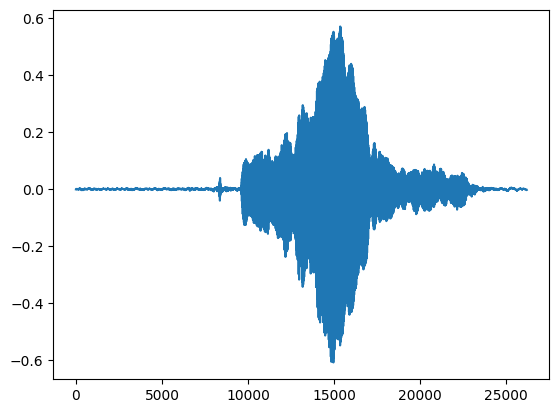

In [ ]:
testing_wav_data, testing_label = load_wav_for_map_tf(testing_wav_file_name, tf.constant(0, dtype=tf.int64))

# Plotar o áudio
_ = plt.plot(testing_wav_data.numpy())
plt.show()

# Tocar o arquivo de áudio
display.display(display.Audio(testing_wav_data.numpy(), rate=16000))

In [ ]:
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names_yamnet =list(pd.read_csv(class_map_path)['display_name'])

for name in class_names_yamnet[:20]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
...


In [ ]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.math.argmax(class_scores)
inferred_class = class_names_yamnet[top_class]

print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

The main sound is: Cat
The embeddings shape: (3, 1024)
